<a href="https://colab.research.google.com/github/Amolla421/Pas-MP1/blob/main/PAS_MP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('/content/drive/MyDrive/TUGAS/car dataset.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


Mengecek Data Kosong

In [9]:
# Mengecek Data Kosong
print(df.isnull().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


In [11]:
# Menghapus Data Kosong
car_data_cleaned = df.dropna()

Visualisasi

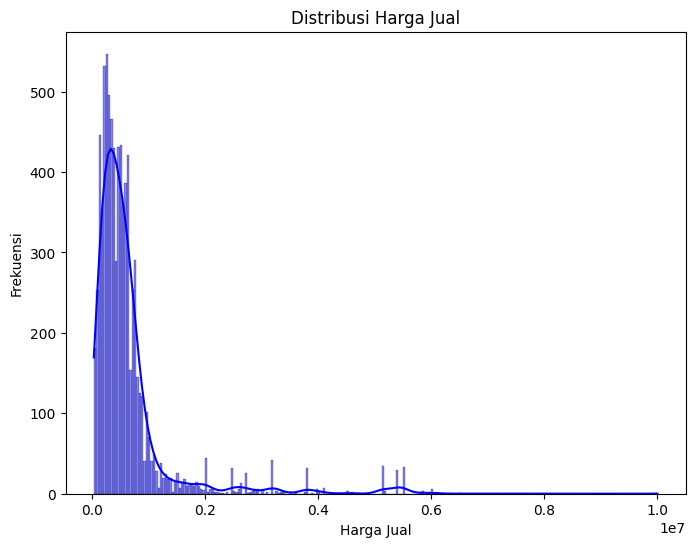

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['selling_price'], kde=True, color='blue')
plt.title("Distribusi Harga Jual")
plt.xlabel("Harga Jual")
plt.ylabel("Frekuensi")
plt.show()

<Axes: xlabel='km_driven', ylabel='selling_price'>

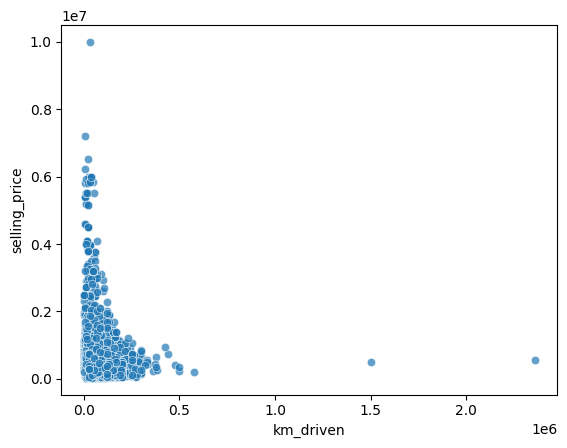

In [17]:
sns.scatterplot(x='km_driven', y='selling_price', data=car_data_cleaned, alpha=0.7)

Modeling

In [20]:
# Memilih Fitur dan Target
X = df[['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']]
y = df['selling_price']

In [21]:
# Membagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Melatih Model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Memprediksi dan Mengevaluasi
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

Visualisasi Nearest Neighbors

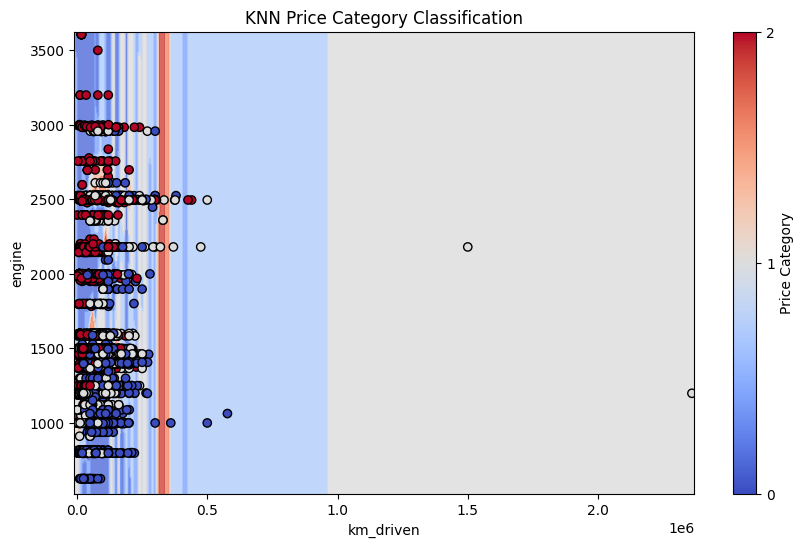

In [26]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.impute import SimpleImputer

# Membuat grid untuk visualisasi keputusan
x_min, x_max = features[:, 0].min() - 10000, features[:, 0].max() + 10000
y_min, y_max = features[:, 1].min() - 100, features[:, 1].max() + 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, 10000), np.arange(y_min, y_max, 100))

Z_probs = knn_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z_probs[:, 2].reshape(xx.shape)


# Plot keputusan KNN
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm') # Now Z contains numerical data
scatter = plt.scatter(features[:, 0], features[:, 1], c=df['price_category'].cat.codes, cmap='coolwarm', edgecolor='k')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Price Category')
plt.xlabel('km_driven')
plt.ylabel('engine')
plt.title('KNN Price Category Classification')
plt.show()

Kalkulasi Euclidean Distance

In [27]:
from scipy.spatial.distance import euclidean

# Contoh kalkulasi jarak Euclidean antara dua data
point_a = features[0]  # Data pertama
point_b = features[1]  # Data kedua

distance = euclidean(point_a, point_b)
print(f"Euclidean Distance between Point A and Point B: {distance}")

Euclidean Distance between Point A and Point B: 25501.22546074992


Evaluasi KNN Classification Model

In [30]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X_knn = df[['km_driven', 'engine']]
y_knn = df['selling_price']

df['price_category'] = pd.cut(df['selling_price'], bins=3, labels=['Low', 'Medium', 'High'])
y_knn = df['price_category']

imputer = SimpleImputer(strategy='mean')
X_knn_imputed = imputer.fit_transform(X_knn)

X_knn_imputed = pd.DataFrame(X_knn_imputed, columns=X_knn.columns, index=X_knn.index)


X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn_imputed, y_knn, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_knn, y_train_knn)

y_pred_knn = knn_classifier.predict(X_test_knn)

print("Confusion Matrix:")
print(confusion_matrix(y_test_knn, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test_knn, y_pred_knn))
print("\nAccuracy Score:")
print(accuracy_score(y_test_knn, y_pred_knn))

Confusion Matrix:
[[1581    7]
 [   6   32]]

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1588
      Medium       0.82      0.84      0.83        38

    accuracy                           0.99      1626
   macro avg       0.91      0.92      0.91      1626
weighted avg       0.99      0.99      0.99      1626


Accuracy Score:
0.9920049200492005


Accuracy

In [42]:
accuracy = accuracy_score(y_test_knn, y_pred_knn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9920049200492005


Precision

In [43]:
precision = precision_score(y_test_knn, y_pred_knn, average='weighted')
print(f"Precision: {precision}")

Precision: 0.9921129806034137


Recall

In [44]:
recall = recall_score(y_test_knn, y_pred_knn, average='weighted')
print(f"Recall: {recall}")

Recall: 0.9920049200492005


F1-Score

In [45]:
f1 = f1_score(y_test_knn, y_pred_knn, average='weighted')
print(f"Recall: {recall}")

Recall: 0.9920049200492005


Matthews Correlation Coefficient (MCC)

In [47]:
mcc = matthews_corrcoef(y_test_knn, y_pred_knn)
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

Matthews Correlation Coefficient (MCC): 0.8271482317892472
